<a href="https://colab.research.google.com/github/jovo999/Marvel_vs_DC/blob/main/Copy_of_Marvel_vs_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv('db.csv' , encoding = 'latin-1')
df

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,6,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,7,Iron Man Three,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,8,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,9,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,10,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [ ]:
df.shape

(39, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           39 non-null     int64  
 1   Original Title       39 non-null     object 
 2   Company              39 non-null     object 
 3   Rate                 39 non-null     float64
 4   Metascore            39 non-null     int64  
 5   Minutes              39 non-null     object 
 6   Release              39 non-null     int64  
 7   Budget               39 non-null     object 
 8   Opening Weekend USA  39 non-null     int64  
 9   Gross USA            39 non-null     int64  
 10  Gross Worldwide      39 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 3.5+ KB


In [ ]:
df['Minutes'] = pd.to_numeric(df['Minutes'] , errors = 'coerce')

In [ ]:
df['Minutes'].fillna(df['Minutes'].mean() , inplace = True)

<ipython-input-6-0e3b28feaa68>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Minutes'].fillna(df['Minutes'].mean() , inplace = True)


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Original Title,0
Company,0
Rate,0
Metascore,0
Minutes,0
Release,0
Budget,0
Opening Weekend USA,0
Gross USA,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [ ]:
df.describe()

,Rate,Metascore,Minutes,Release,Opening Weekend USA,Gross USA,Gross Worldwide
count,39.000000,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,3.900000e+01
mean,7.202564,63.666667,132.594595,2013.794872,1.151098e+08,3.232659e+08,8.275727e+08
std,1.074706,13.860837,18.099810,4.286942,6.866708e+07,1.807086e+08,5.332318e+08
min,3.300000,27.000000,81.000000,2004.000000,5.379365e+06,1.054712e+07,1.090331e+07
25%,6.900000,56.500000,121.500000,2011.000000,6.539093e+07,2.032217e+08,4.843193e+08
50%,7.300000,67.000000,132.594595,2015.000000,9.620234e+07,3.186041e+08,7.468469e+08
75%,7.850000,72.500000,143.000000,2017.000000,1.559225e+08,4.085492e+08,1.104658e+09
max,9.000000,88.000000,181.000000,2019.000000,3.571150e+08,8.583730e+08,2.797801e+09


In [ ]:
def best_film(df):
    if df['Rate'] == 10:
        return 'great film'
    elif df['Rate'] >= 8:
        return 'good film'
    elif df['Rate'] >= 7:
        return 'average film'
    elif df['Rate'] >= 5:
        return 'normal film'
    else:
        return 'bad film'

df['rate_film'] = df.apply(best_film , axis = 1)
df.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,rate_film
0,Iron Man,Marvel,7.9,79,126.000000,2008,140000000,98618668,318604126,585366247,average film
1,The Incredible Hulk,Marvel,6.7,61,132.594595,2008,150000000,55414050,134806913,263427551,normal film
2,Iron Man 2,Marvel,7.0,57,132.594595,2010,200000000,128122480,312433331,623933331,average film
3,Thor,Marvel,7.0,57,115.000000,2011,150000000,65723338,181030624,449326618,average film
4,Captain America: The First Avenger,Marvel,6.9,66,124.000000,2011,140000000,65058524,176654505,370569774,normal film


In [ ]:
df.groupby('rate_film')['Rate'].count()

,Rate
rate_film,
average film,20
bad film,2
good film,8
normal film,9


In [ ]:
high_budget = df.groupby('Original Title')['Budget'].sum().reset_index().sort_values('Budget' , ascending = False)
high_budget.head(10)


,Original Title,Budget
21,Joker,55000000
22,Jonah Hex,47000000
4,Avengers: Endgame,356000000
5,Avengers: Infinity War,321000000
23,Justice League,300000000
29,Superman Returns,270000000
32,The Dark Knight Rises,250000000
3,Avengers: Age of Ultron,250000000
7,Batman v Superman: Dawn of Justice,250000000
9,Captain America: Civil War,250000000


In [ ]:
gross_film = df.groupby('Original Title')['Gross Worldwide'].sum().reset_index().sort_values('Gross Worldwide' , ascending = False)
gross_film.head(10)

,Original Title,Gross Worldwide
4,Avengers: Endgame,2797800564
5,Avengers: Infinity War,2048359754
30,The Avengers,1518812988
3,Avengers: Age of Ultron,1402805868
8,Black Panther,1346913161
20,Iron Man Three,1214811252
9,Captain America: Civil War,1153296293
2,Aquaman,1148161807
26,Spider-Man: Far from Home,1131927996
12,Captain Marve,1128274794


In [ ]:
df['Company'].value_counts()

,count
Company,
Marvel,23
DC,16


In [ ]:
met = df.groupby('Original Title')['Minutes'].sum().reset_index().sort_values(by ='Minutes' ,ascending = False).head(10)
met

,Original Title,Minutes
4,Avengers: Endgame,181.0
32,The Dark Knight Rises,164.0
37,Watchmen,162.0
29,Superman Returns,154.0
31,The Dark Knight,152.0
7,Batman v Superman: Dawn of Justice,151.0
5,Avengers: Infinity War,149.0
9,Captain America: Civil War,147.0
2,Aquaman,143.0
24,Man of Steel,143.0


In [ ]:
best_moive = df.groupby('Original Title')['Rate'].sum().reset_index().sort_values('Rate' , ascending = False)
best_moive.head(10)

,Original Title,Rate
31,The Dark Knight,9.0
21,Joker,8.7
4,Avengers: Endgame,8.5
5,Avengers: Infinity War,8.5
32,The Dark Knight Rises,8.4
6,Batman Begins,8.2
16,Guardians of the Galaxy,8.0
30,The Avengers,8.0
36,Thor:Ragnarok,7.9
18,Iron Man,7.9


In [ ]:
meta = df.groupby('Metascore')['Gross Worldwide'].sum().reset_index().sort_values('Gross Worldwide' , ascending = False).head(10)
meta

,Metascore,Gross Worldwide
25,78,3878841851
17,69,2650740984
16,68,2048359754
7,55,1816207325
14,66,1773375642
18,70,1710508939
13,64,1647586759
24,76,1594623612
28,88,1346913161
12,62,1214811252


In [ ]:
df.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,rate_film
0,Iron Man,Marvel,7.9,79,126.000000,2008,140000000,98618668,318604126,585366247,average film
1,The Incredible Hulk,Marvel,6.7,61,132.594595,2008,150000000,55414050,134806913,263427551,normal film
2,Iron Man 2,Marvel,7.0,57,132.594595,2010,200000000,128122480,312433331,623933331,average film
3,Thor,Marvel,7.0,57,115.000000,2011,150000000,65723338,181030624,449326618,average film
4,Captain America: The First Avenger,Marvel,6.9,66,124.000000,2011,140000000,65058524,176654505,370569774,normal film


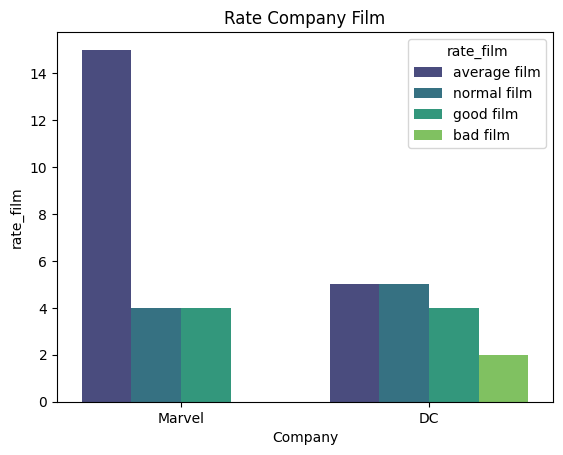

In [ ]:
sns.countplot(x='Company' , data=df , hue='rate_film' , palette='viridis')
plt.title('Rate Company Film')
plt.ylabel('rate_film')
plt.show()

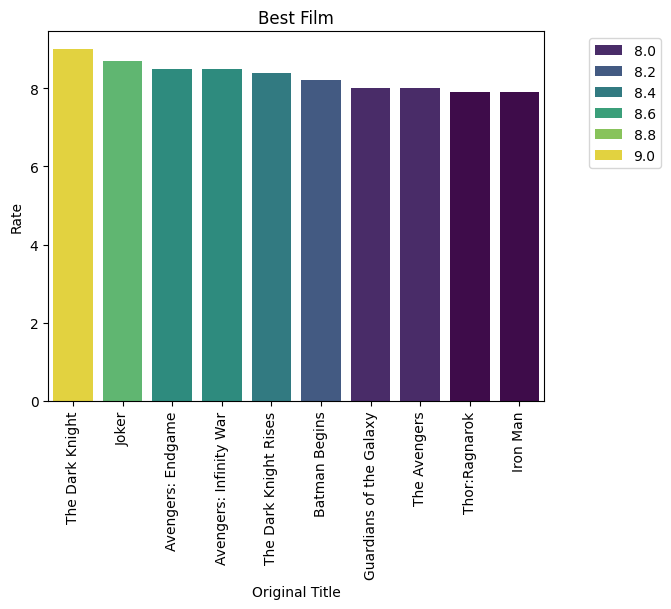

In [ ]:
sns.barplot(data=best_moive.head(10) ,x='Original Title' , y='Rate' ,  palette='viridis' , hue='Rate')
plt.legend(loc='upper right' , bbox_to_anchor=(1.25, 1))
plt.title('Best Film')
plt.xticks(rotation=90)
plt.show()

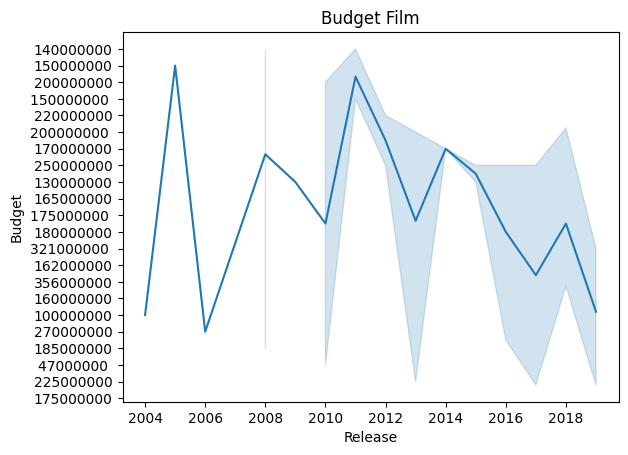

In [ ]:
sns.lineplot(data=df , x='Release' , y='Budget')
plt.title('Budget Film')
plt.show()

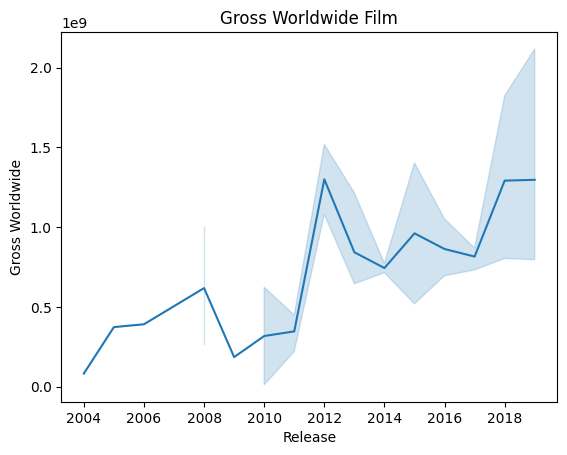

In [ ]:
sns.lineplot(data=df , x='Release' , y='Gross Worldwide')
plt.title('Gross Worldwide Film')
plt.show()

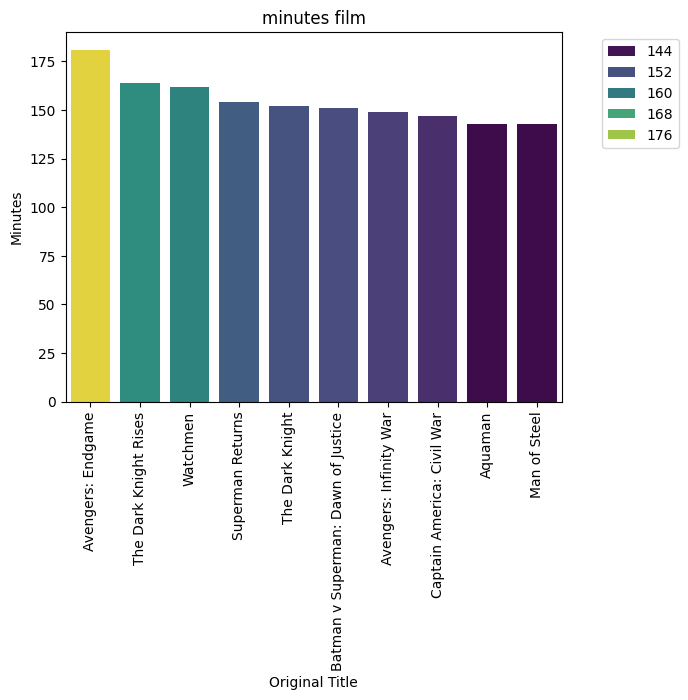

In [ ]:
sns.barplot(data=met.head(10) , x='Original Title' , y='Minutes' , palette='viridis', hue='Minutes' )
plt.legend(loc='upper right' , bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=90)
plt.title('minutes film')
plt.show()

<ipython-input-47-c4df3b7c4cf4>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=meta , x='Metascore' , y='Gross Worldwide' , palette='viridis')


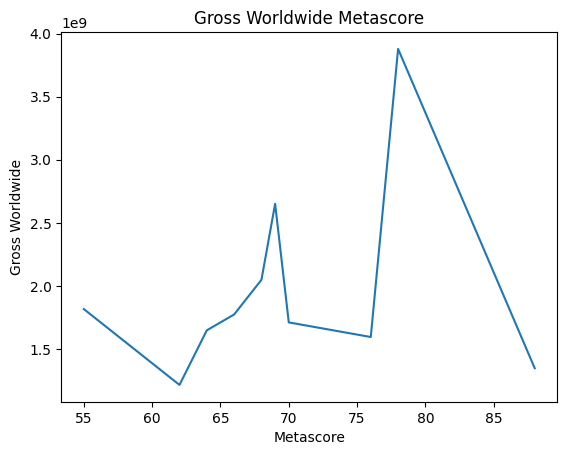

In [ ]:
sns.lineplot(data=meta , x='Metascore' , y='Gross Worldwide' , palette='viridis')
plt.title('Gross Worldwide Metascore')
plt.show()

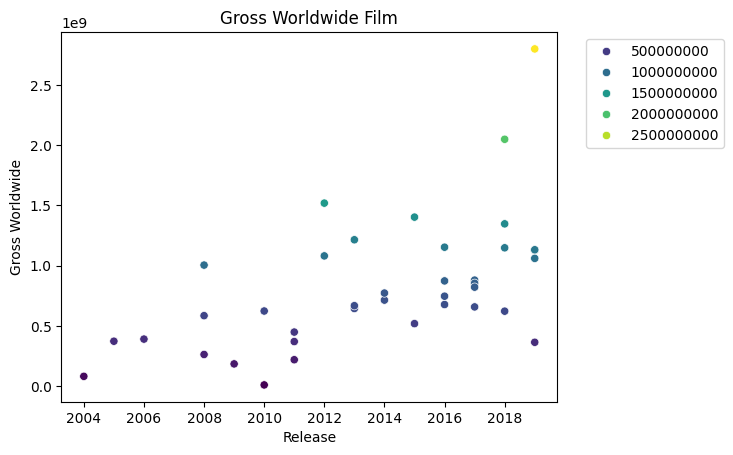

In [ ]:
sns.scatterplot(data=df , x='Release' , y='Gross Worldwide' , palette='viridis' , hue='Gross Worldwide')
plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
plt.title('Gross Worldwide Film')
plt.show()